In [11]:
import pandas as pd

In [1]:
!pip install tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
##divide dataset into independent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
## Feature engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [15]:
##concatinate
X=X.drop(['Geography','Gender'],axis=1)

In [16]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [18]:
X=pd.concat([X,geography,gender],axis=1)

In [19]:
##Train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
##feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\Users\samat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [24]:
X_test


array([[-6.71215999, -3.75385611, -1.36196021, ...,  3.50970685,
        -1.90281812, -3.28346797],
       [-6.72002426, -3.70805965, -2.08036138, ..., -1.89456703,
        -1.90281812, -3.28346797],
       [-6.70057614, -3.68974106, -1.36196021, ..., -1.89456703,
         3.46467078, -3.28346797],
       ...,
       [-6.7141792 , -3.74469682, -2.20009491, ..., -1.89456703,
         3.46467078,  0.74739332],
       [-6.70652748, -3.7630154 , -1.84089432, ...,  3.50970685,
        -1.90281812,  0.74739332],
       [-6.71471057, -3.79965257, -1.36196021, ...,  3.50970685,
        -1.90281812,  0.74739332]])

In [26]:
X_train.shape

(8000, 11)

In [29]:
## part2 creat ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [30]:
##lets initialize the ANN
classifier=Sequential()

In [31]:
##add input layer
classifier.add(Dense(units=11,activation='relu'))

In [32]:
##add first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [33]:
##add second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [34]:
##add output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [36]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
##early stopping
import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0002,
    patience=30,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [39]:
model_histroy=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3327 - accuracy: 0.8604 - val_loss: 0.3656 - val_accuracy: 0.8470
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3316 - accuracy: 0.8638 - val_loss: 0.3647 - val_accuracy: 0.8512
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3317 - accuracy: 0.8625 - val_loss: 0.3662 - val_accuracy: 0.8470
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3304 - accuracy: 0.8638 - val_loss: 0.3663 - val_accuracy: 0.8489
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3307 - accuracy: 0.8634 - val_loss: 0.3656 - val_accuracy: 0.8470
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3298 - accuracy: 0.8623 - val_loss: 0.3658 - val_accuracy: 0.8497
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3294 - accuracy: 0.8636 - val_loss: 0.3670 - val_accuracy:

536/536 [==============================] - 3s 5ms/step - loss: 0.3162 - accuracy: 0.8681 - val_loss: 0.3653 - val_accuracy: 0.8535
Epoch 58/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3158 - accuracy: 0.8698 - val_loss: 0.3683 - val_accuracy: 0.8516
Epoch 59/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3155 - accuracy: 0.8679 - val_loss: 0.3693 - val_accuracy: 0.8535
Epoch 60/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3156 - accuracy: 0.8705 - val_loss: 0.3647 - val_accuracy: 0.8519
Epoch 61/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3150 - accuracy: 0.8690 - val_loss: 0.3647 - val_accuracy: 0.8542
Epoch 62/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3152 - accuracy: 0.8714 - val_loss: 0.3672 - val_accuracy: 0.8527
Epoch 63/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3157 - accuracy: 0.8692 - val_loss: 0.3647 - val_accuracy: 0.8523

In [42]:
model_histroy.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

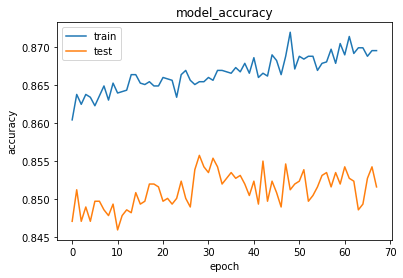

In [43]:
#summery histroy
plt.plot(model_histroy.history['accuracy'])
plt.plot(model_histroy.history['val_accuracy'])  # RAISE ERROR
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

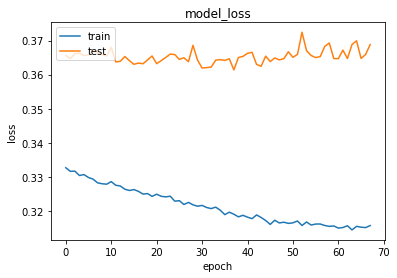

In [44]:
plt.plot(model_histroy.history['loss'])
plt.plot(model_histroy.history['val_loss'])  # RAISE ERROR
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
##make predictions
  ##  Predicting test set
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [48]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1595,    0],
       [ 403,    2]], dtype=int64)

In [49]:
#calculate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [50]:
score

0.7985

In [51]:
##get the weights
classifier.get_weights()

[array([[ 0.1569776 ,  0.17216614,  0.21265768,  0.03420324,  0.08342817,
         -0.05525719, -0.07961888,  0.12984563,  0.25658605, -0.32627594,
          0.2506121 ],
        [ 0.96360856,  0.33010766,  0.37284568, -0.61384845, -0.93922764,
          0.47680053, -0.7013464 , -0.75160486, -0.37392965,  0.86535174,
         -0.16069034],
        [ 0.31593618,  0.08203539,  0.13992128, -0.04234533,  0.03842311,
          0.21400139,  0.13568088, -0.1462829 , -0.01571688, -0.1274245 ,
          0.08381215],
        [ 0.01323269, -0.36349162, -0.13856171,  0.08678941,  0.193132  ,
          0.24459808,  0.28915492,  0.40657318, -0.96939915,  0.00829189,
          0.01040237],
        [-0.40029353, -0.12100045,  0.23557442,  0.27000234,  0.46717554,
          0.44193518,  0.06563373, -0.6250277 ,  0.23745587,  0.46306434,
          1.8194802 ],
        [-0.32308152, -0.06249535, -0.29242995,  0.10241634,  0.13896014,
          0.21893437, -0.49237615,  0.41484705, -0.05891178,  0.1041634